<a href="https://colab.research.google.com/github/mbaliu-treino/Desenvolve/blob/main/LEARN_DataScience_IO_formatos_de_entrada_e_sa%C3%ADda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=orange>**Pandas: formatos diferentes de entrada e saída (IO)**</font>

<a href=https://colab.research.google.com/drive/1vFFvCYaNoBBqfD56zf-J2w4PWh_ojG_O><font color=gray size=2>Arquivo Colab</font></a>

<ul><font size=2 color=gray>FICHA TÉCNICA
<li><a href=https://cursos.alura.com.br/course/pandas-io><font size=2 color=gray>Pandas: formatos diferentes de entrada e saída (IO)</a>
<li>Carga Horária: 6 h
<li>Instrutora: Guilherme Lima
<li>Data de Início: fev. de 2022
</ul>

<hr color=gray><br>
<h3><b>Conteúdo / Aprendizagem:</b></h3>

- Solicitação de dados por meio de API (URL);
- O que é o formato JSON;
- Leitura de formato JSON no Pandas
- Como trabalhar com SQL com o Pandas
    - Acesso a banco de dados
    - Leitura de tabelas
    - Realização de queries
    - Salavar DataFrames em bancos de dados
- Obter arquivos em arquivos HTML
- Salvar DataFrames em:
    - CSV
    - JSON
    - HTML
    - XLS

# <font color=orange>RESUMO</font>

<a href=https://docs.google.com/spreadsheets/d/1tTygYlq9r7nkUsw9a25N5_z57-de_59tSBCIVPw6KUw><font size=2 color=gray>ROTEIROS Data Science</font></a>

<a href=https://colab.research.google.com/drive/1pTlATv-fy4Oasyvd3ASWrCNKorudvaQE><font size=2 color=gray>DS Roteiro Análise de Dados (Notebook)</font></a>


1. 


# <font color=orange>**CURSO**</font>

**Projeto**: Muitas vezes os dados que iremos carregar não estão no formato CSV, mas diversos outros espalhados pela internet e pelos sistemas. Neste curso serão abordados os principais tipos de formatos de arquivos nos trabalhos com dados. Será simulado um trabalho de análise dos dados em uma instituição de ensino. A primeira parte será para construir os dados fictícios da escola e aprender como obter os dados de diversas formas.

<font color=orange></font>

## JSON

Nosso primeiro resultado será "IBGE - API de serviço de dados", que nos levará direto a uma API com informações coletadas no censo de 2010, divididas em "Frequência por nome" e "Ranking por frequência". Acessaremos esse segundo conjunto clicando no link:

https://servicodados.ibge.gov.br/api/v2/censos/nomes/ranking

> <font color=orange>A API é uma forma de comunicação entre máquinas que permite maior integração na troca de informações, garantindo melhor otimização no tamanho dos dados, consquentemente menor tempo de transferência, e disponibilização de forma organizada, facilitando o acesso aos dados desejados. Os dados solicitados através de uma API, a qual muitas vezes é é um simples URL, são retornados em uma arquivo de texto pleno chamado JSON. Os dados estão disponibilizados de forma hierárquica.</font>

Receberemos no navegador uma lista de nomes (como "JOSE" e "MARIA") no formato JSON. Se aleterarmos o link para a versão 1 do conjunto (v1), teremos uma visualização mais facilitada.

https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking

Aqui identificaremos nomes como "ANA", "ANTONIO" e assim por diante. Também podemos filtrar mais as nossas informações. Após "`ranking`", adicionaremos uma interrogação (`?`) e o parâmetro `qtd=20`. Além disso, usaremos o caractere `&` (conhecido como "e comercial") para passarmos mais um parâmetro, `sexo=f`.

https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=f

Nosso resultado será uma lista contendo 20 nomes, todos eles do sexo feminino. Se alterarmos o último parâmetro para `sexo=m`, conseguiremos os nomes de sexo masculino.

In [ ]:
import pandas as pd

In [ ]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")

In [ ]:
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
177,JENIFER,0,88574,178,F
188,POLIANA,0,84237,189,F
64,VIVIANE,0,230213,65,F
178,ELIZANGELA,0,88505,179,F
85,HELENA,0,197065,86,F


In [ ]:
mensagem = "Quantidade de nomes: {}".format(len(nomes_f) + len(nomes_m))
print(mensagem)

Quantidade de nomes: 400


In [ ]:
frames = [nomes_m, nomes_f]
frames

[          nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198    M
 198     ALVARO       0    65444   199    M
 199    GEOVANE       0    65435   200    M
 
 [200 rows x 5 columns],           nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198  

In [ ]:
nomes = pd.concat(frames)  # Junta os dois DataFrames
nomes = nomes['nome']  # Filatra somente a coluna 'nome'
nomes = nomes.to_frame()  # Converte para DataFrame
nomes.sample(5)

,nome
173,GERALDA
86,CRISTINA
69,TEREZA
76,TATIANE
105,PABLO


## SQL

Em grandes organizações é comum que os dados estejam armazenados em bancos de dados. Este são arquivos otimizados para armazenar grande quantidades de dados e permitir o acesso de forma intensa.

Uma linguagem específica para estruturar o acesso aos bancos de dados é a SQL.

In [ ]:
# !pip install sqlalchemy

In [ ]:
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

engine = create_engine('sqlite:///:memory:')
engine

Engine(sqlite:///:memory:)

In [ ]:
type(engine)

sqlalchemy.engine.base.Engine

In [ ]:
matriculas_por_cursos.to_sql('matriculas', engine)

NameError: ignored

In [ ]:
# Inspecionado o Banco de Dados
inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

In [ ]:
# CONSULTA
query = "select * from matriculas"
# query = 'select * from matriculas where quantidade_de_alunos < 20'

pd.read_sql(query, engine)

In [ ]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['Nome_do_curso', 'quantidade_de_alunos'])

In [ ]:
muitas_matriculas.query("quantidade_de_alunos > 10")

In [ ]:
!ls

sample_data


<h3>Incluindo o ID</h3>

In [ ]:
import numpy as np

In [ ]:
# SEED RANDOM
np.random.seed(123)

In [ ]:
# Referencia para um Index aleatório
total_alunos = len(nomes)

In [ ]:
# SEQUENCIA ALEATÓRIA SEM REPETIÇÃO
np.random.permutation(5) +1

array([2, 4, 5, 1, 3])

In [ ]:
# id aleatório
nomes['id_alunos'] = np.random.permutation(total_alunos) +1
nomes.sample(5)

,nome,id_alunos
188,VALDECIR,333
57,IGOR,224
3,ANTONIA,229
182,LIDIANE,254
30,ELIANE,356


In [ ]:
# E-mail
dominio = ['@dom1.com', '@servico.com']

In [ ]:
# SELEÇÃO ALEATÓRIA
np.random.choice(dominio, 5)

array(['@dom1.com', '@servico.com', '@servico.com', '@dom1.com',
       '@servico.com'], dtype='<U12')

In [ ]:
# 
nomes['dominio'] = np.random.choice(dominio, total_alunos)  # Seleciona o domínio aleatoriamente
nomes['email'] = nomes['nome'].str.cat(nomes['dominio'])
nomes['email'] = nomes['email'].str.lower()  # Transforma tudo para caixa baixa
nomes.sample(5)

,nome,id_alunos,dominio,email
105,MILENA,194,@dom1.com,milena@dom1.com
36,ROBERTO,180,@servico.com,roberto@servico.com
43,TEREZINHA,337,@servico.com,terezinha@servico.com
147,ALISSON,330,@dom1.com,alisson@dom1.com
133,BRENDA,313,@dom1.com,brenda@dom1.com


## HTML

Retorna uma lista com as tabelas identificadas.

In [ ]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [ ]:
# NO JUPYTER É NECESSÁRIO BAIXAR COMPLEMENTOS
# !pip3 install html5lib
# !pip3 install lxml

import html5lib

In [ ]:
type(cursos)

list

In [ ]:
type(cursos[0])

pandas.core.frame.DataFrame

In [ ]:
cursos[0]

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


<h3> Indexando os cursos</h3>

In [ ]:
cursos = cursos[0].rename(columns={'Nome do curso': 'Nome_do_curso'})

In [ ]:
cursos.head()

,Nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [ ]:
cursos['id'] = cursos.index + 1
cursos.head()

,Nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [ ]:
cursos = cursos.set_index('id')
cursos.head()

,Nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


<h3> Matriculando alunos nos cursos</h3>

Deseja-se criar uma distribuição com muitos alunos com poucas matrículas e muitos alunos com diversas matrículas.

In [ ]:
nomes.sample(5)

,nome,id_alunos,dominio,email
142,RAISSA,381,@dom1.com,raissa@dom1.com
57,IGOR,224,@servico.com,igor@servico.com
133,BRENDA,313,@dom1.com,brenda@dom1.com
22,VITORIA,296,@dom1.com,vitoria@dom1.com
191,ERICK,116,@dom1.com,erick@dom1.com


In [ ]:
# DISTRIBUIÇÃO EXPONENCIAL
dist_exp = np.random.exponential(size=10)
intensificado = dist_exp * 1.5
arredondado = np.ceil(intensificado)
arredondado.astype(int) 

array([1, 1, 5, 5, 1, 1, 3, 2, 1, 1])

In [ ]:
# Atribuindo matrículas aos alunos de forma exponencial
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)
nomes.sample(5)

,nome,id_alunos,dominio,email,matriculas
137,AUGUSTO,72,@servico.com,augusto@servico.com,1
130,ELIZABETE,19,@dom1.com,elizabete@dom1.com,2
107,ELISANGELA,117,@servico.com,elisangela@servico.com,1
73,MARCO,92,@servico.com,marco@servico.com,1
31,JOSEFA,371,@dom1.com,josefa@dom1.com,1


In [ ]:
nomes['matriculas'].describe()

count    400.000000
mean       2.117500
std        1.504777
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: matriculas, dtype: float64

# Análise das matrículas

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


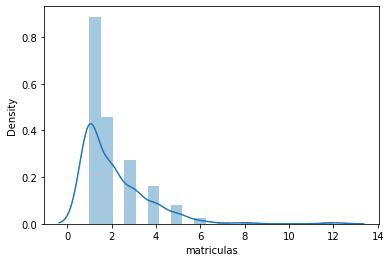

In [ ]:
sns.distplot(nomes['matriculas'])

In [ ]:
nomes['matriculas'].value_counts()

1     186
2      96
3      57
4      34
5      17
6       5
12      2
8       2
7       1
Name: matriculas, dtype: int64

## Selecionando os cursos dos alunos

In [ ]:
nomes.sample(3)

,nome,id_alunos,dominio,email,matriculas
162,ESTER,214,@servico.com,ester@servico.com,1
70,ISABELA,64,@dom1.com,isabela@dom1.com,3
164,JAIRO,81,@dom1.com,jairo@dom1.com,1


In [6]:
# Probabilidade de seleção
todas_matriculas =[]
x = np.random.rand(20)
prob = x / sum(x)

array([0.07636512, 0.05539698, 0.05970414, 0.09184792, 0.0329748 ,
       0.07653184, 0.0458085 , 0.01711629, 0.08204709, 0.0880924 ,
       0.05734494, 0.03622809, 0.06588603, 0.05486878, 0.05871092,
       0.00318264, 0.02987574, 0.03693431, 0.01461633, 0.01646714])

In [ ]:

for index, row in nomes.iterrows():
    id = row['id_alunos']
    matriculas = row['matriculas']

    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p=prob)]
        todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns=['id_alunos', 'id_curso'])

In [ ]:
# Quantos alunos há em cada cursos?
matriculas_por_cursos = matriculas.groupby('id_curso').count()
# matriculas_por_cursos = matriculas_por_cursos.join(cursos['Nome_do_curso'])
matriculas_por_cursos = matriculas_por_cursos.merge(cursos[['Nome_do_curso']], 
    how='left',
    left_on='id_curso',
    right_index=True)

matriculas_por_cursos.rename(
    columns={'id_alunos': 'quantidade_de_alunos'},
    inplace=True)

matriculas_por_cursos.sample(5)

,quantidade_de_alunos,Nome_do_curso
id_curso,,
19,43,Boas práticas em Java
6,55,PHP com MySql
1,90,Lógica de programação
10,30,Código limpo com C#
7,8,.NET para web


# SAÍDAS

## CSV

In [ ]:
matriculas_por_cursos.to_csv('matriculas_por_cursos.csv', index=False, sep=';')

In [ ]:
matriculas_json = matriculas_por_cursos.to_json()
matriculas_json

'{"quantidade_de_alunos":{"1":90,"2":28,"3":67,"4":74,"5":33,"6":55,"7":8,"8":28,"9":9,"10":30,"11":85,"12":2,"13":63,"14":46,"15":34,"16":76,"17":60,"18":16,"19":43},"Nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java"}}'

In [ ]:
matriculas_html = matriculas_por_cursos.to_html()
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>Nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>90</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>28</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>67</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>74</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>33</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>55</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>8</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>28</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>9</td>
  

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>Nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>4</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>4</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>1</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>4</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>1</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>5</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>11</td>
      <td>TDD com Java</td>
    </tr>
    <tr>
      <th>11</th>
      <td>6</td>
      <td>Preparatório para certificação Java</td>
    </tr>
    <tr>
      <th>12</th>
      <td>1</td>
      <td>Hardware básico</td>
    </tr>
    <tr>
      <th>13</th>
      <td>7</td>
      <td>Persistência com .NET</td>
    </tr>
    <tr>
      <th>14</th>
      <td>6</td>
      <td>Desenvolvendo jogos</td>
    </tr>
    <tr>
      <th>15</th>
      <td>3</td>
      <td>Análise de dados</td>
    </tr>
    <tr>
      <th>16</th>
      <td>5</td>
      <td>Estatística básica</td>
    </tr>
    <tr>
      <th>17</th>
      <td>7</td>
      <td>Internet das coisas</td>
    </tr>
    <tr>
      <th>18</th>
      <td>7</td>
      <td>Programação funcional</td>
    </tr>
    <tr>
      <th>19</th>
      <td>8</td>
      <td>Boas práticas em Java</td>
    </tr>
    <tr>
      <th>20</th>
      <td>2</td>
      <td>Orientação objetos com Java</td>
    </tr>
  </tbody>
</table>

<h3> Nomes dos LAunos da próxima turma</h3>

In [ ]:
matriculas_por_cursos

,quantidade_de_alunos,Nome_do_curso
id_curso,,
1,90,Lógica de programação
2,28,Java para Web
3,67,C# para Web
4,74,Ruby on Rails
5,33,Cursos de Python
6,55,PHP com MySql
7,8,.NET para web
8,28,Novas integrações com Java
9,9,TDD com Java


In [ ]:
matriculas

,id_alunos,id_curso
0,158,1
1,218,15
2,218,3
3,218,19
4,218,5
...,...,...
842,58,6
843,124,14
844,107,6
845,84,11


In [ ]:
id_curso = 16

# Selecionar todos alunos que possuem id_curso = 16
# matriculas[matriculas['id_curso'] == id_curso]
proximas_turmas = matriculas.query(f"id_curso == {id_curso}")
proximas_turmas

,id_alunos,id_curso
33,259,16
37,76,16
56,73,16
61,16,16
96,395,16
...,...,...
772,359,16
776,100,16
784,177,16
805,312,16


In [ ]:
proximas_turmas.set_index('id_alunos').join(nomes.set_index('id_alunos'))[['nome']]
# proximas_turmas.set_index('id_alunos').join(nomes.set_index('id_alunos'))['nome'].to_frame()

,nome
id_alunos,
5,JAIME
13,VALTER
13,VALTER
16,LEONARDO
22,ARTHUR
...,...
380,CHARLES
382,OSVALDO
383,LILIAN


In [ ]:
# Acessando um dado
nome_curso = cursos.loc[id_curso]
nome_curso

Nome_do_curso    Estatística básica
Name: 16, dtype: object

In [ ]:
nome_curso = nome_curso['Nome_do_curso']
nome_curso

'Estatística básica'

In [ ]:
proxima_turma = proximas_turmas.set_index('id_alunos').join(nomes.set_index('id_alunos'))[['nome']]
proxima_turma

,nome
id_alunos,
5,JAIME
13,VALTER
13,VALTER
16,LEONARDO
22,ARTHUR
...,...
380,CHARLES
382,OSVALDO
383,LILIAN


In [ ]:
proxima_turma = proxima_turma.rename(columns={'nome': f'Alunos do curso de {nome_curso}'})

## XLS

In [ ]:
proxima_turma.to_excel('proxima_turma.xls', index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.
